## Aglomerative Clustering on Digit dataset
This notebook presents illustration of various linkage option for using the agglomerative clustering technique on a 2D embedding of the digits dataset.
The goal of this example is clusters the digits based on their similarities on a 2D embedding, where the similar digits get closer and the dissimilar ones get apart.
The code is based on:
 "https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py"

In [13]:
# libraries
from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, manifold
from sklearn.cluster import AgglomerativeClustering

In [19]:
# generate dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape
print(X.shape)

np.random.seed(0)

(1797, 64)


In [18]:
# 2D embedding of the digits dataset
print("Computing embedding")
data = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print(data.shape)
print("Done.")

Computing embedding
(1797, 2)
Done.


### Visualisation Function

In [16]:
# Visualize the clustering
def plot_clustering(X_data, labels, title=None):
    # Normalise data
    x_min, x_max = np.min(X_data, axis=0), np.max(X_data, axis=0)
    X_data = (X_data - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_data[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Agglomerative Clustering with various Linkage Approaches

ward :	0.04s
average :	0.04s
complete :	0.04s
single :	0.00s


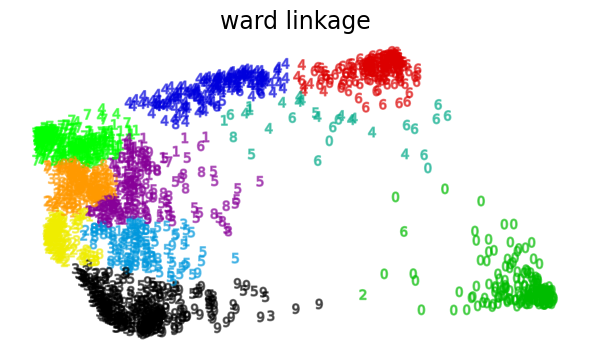

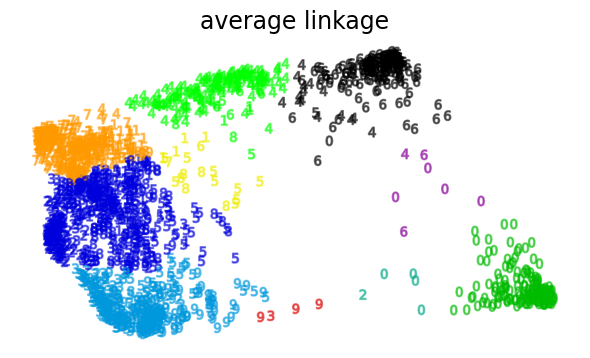

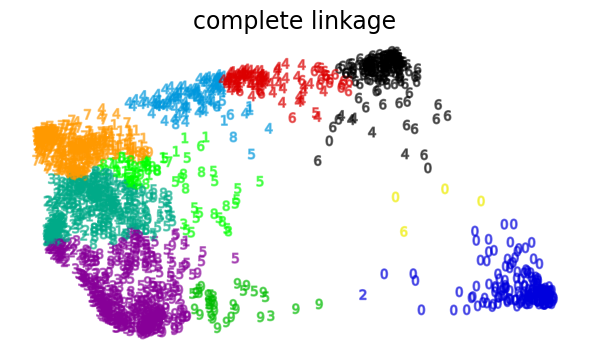

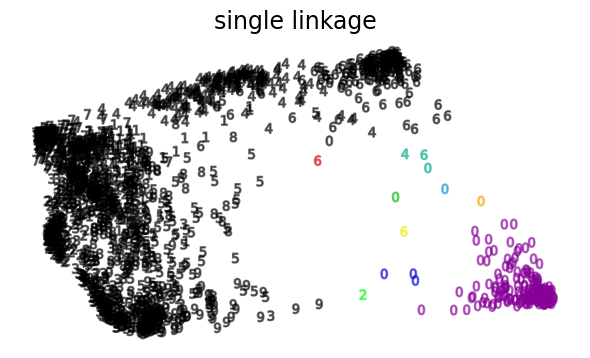

In [17]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(data)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(data, clustering.labels_, "%s linkage" % linkage)


plt.show()

### Reflection
You may look at output of the linkage methods and highlight the differences